In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
print('Using PyTorch version:', torch.__version__, ' Device:', device)

Using PyTorch version: 1.9.1  Device: cpu


In [5]:
batch_size = 32

train_dataset = datasets.MNIST('./data', 
                               train=True, 
                               download=True, 
                               transform=transforms.ToTensor())

validation_dataset = datasets.MNIST('./data', 
                                    train=False, 
                                    transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                                batch_size=batch_size, 
                                                shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


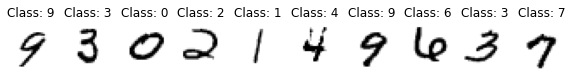

In [7]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(28,28), cmap="gray_r")
    plt.title('Class: '+str(y_train[i].item()))

In [8]:
class Net(nn.Module):
    def __init__(self, Net):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 50)
        self.fc1_drop = nn.Dropout(0.2)
        self.fc2 = nn.Linear(50, 50)
        self.fc2_drop = nn.Dropout(0.2)
        self.fc3 = nn.Linear(50, 50)
        self.fc3_drop = nn.Dropout(0.2)
        self.fc4 = nn.Linear(50, 50)
        self.fc4_drop = nn.Dropout(0.2)
        self.fc5 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        x = F.relu(self.fc2(x))
        x = self.fc2_drop(x)
        x = F.relu(self.fc3(x))
        x = self.fc3_drop(x)
        x = F.relu(self.fc4(x))
        x = self.fc4_drop(x)
        return F.log_softmax(self.fc5(x), dim=1)

model = Net(Net).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()



print(model)

model.fc1.weight

model.fc1.weight.size()

Net(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc1_drop): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc2_drop): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=50, out_features=50, bias=True)
  (fc3_drop): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=50, out_features=50, bias=True)
  (fc4_drop): Dropout(p=0.2, inplace=False)
  (fc5): Linear(in_features=50, out_features=10, bias=True)
)


torch.Size([50, 784])

In [9]:
model.fc3.weight

Parameter containing:
tensor([[ 0.0584,  0.0014,  0.0943,  ..., -0.0109,  0.0863,  0.0553],
        [-0.0459, -0.0720,  0.1261,  ..., -0.0339, -0.0722,  0.0471],
        [ 0.0855,  0.0432, -0.0409,  ...,  0.0389, -0.1095, -0.0933],
        ...,
        [ 0.0024, -0.0747, -0.0078,  ...,  0.0906, -0.0174,  0.1373],
        [ 0.1030, -0.1299, -0.0027,  ...,  0.1101,  0.0661,  0.0442],
        [ 0.1278, -0.0672, -0.0647,  ...,  0.1018,  0.0829, -0.0989]],
       requires_grad=True)

In [10]:
model.fc3.weight.size()

torch.Size([50, 50])

In [11]:
model.fc1.weight

Parameter containing:
tensor([[ 0.0349, -0.0294,  0.0270,  ...,  0.0211, -0.0113,  0.0100],
        [ 0.0230,  0.0346,  0.0006,  ..., -0.0300, -0.0025, -0.0240],
        [ 0.0353,  0.0303, -0.0055,  ..., -0.0158,  0.0199,  0.0016],
        ...,
        [ 0.0109, -0.0212,  0.0062,  ..., -0.0096, -0.0263,  0.0157],
        [ 0.0228,  0.0040,  0.0327,  ...,  0.0143, -0.0126,  0.0213],
        [-0.0165,  0.0011, -0.0155,  ..., -0.0082, -0.0025, -0.0165]],
       requires_grad=True)

In [12]:
model.fc2.weight

Parameter containing:
tensor([[ 0.0470, -0.0461, -0.0431,  ...,  0.1168,  0.0541,  0.1002],
        [ 0.0733, -0.0984,  0.0675,  ...,  0.1172, -0.0131, -0.0685],
        [ 0.0556,  0.0902,  0.0211,  ..., -0.0379,  0.0555, -0.1101],
        ...,
        [-0.0592, -0.1368, -0.1186,  ...,  0.0032,  0.0745, -0.0906],
        [ 0.0982,  0.0673,  0.0709,  ..., -0.0569, -0.1065,  0.0251],
        [ 0.1401, -0.1190,  0.0166,  ...,  0.0764,  0.0777,  0.0952]],
       requires_grad=True)

In [13]:
model.fc4.weight

Parameter containing:
tensor([[-0.0600,  0.0131, -0.0966,  ...,  0.0281,  0.0209, -0.0095],
        [ 0.1027, -0.0468,  0.0203,  ..., -0.0534,  0.1111, -0.1395],
        [-0.0767, -0.1173, -0.0317,  ..., -0.0370,  0.0207,  0.0800],
        ...,
        [-0.1246, -0.0612, -0.0361,  ..., -0.0295, -0.1329, -0.0722],
        [ 0.0978, -0.0848, -0.0385,  ..., -0.0004, -0.0093, -0.0783],
        [ 0.0602,  0.0678, -0.0726,  ..., -0.0699, -0.0620, -0.0749]],
       requires_grad=True)

In [14]:
model.fc5.weight

Parameter containing:
tensor([[ 0.0468,  0.0113,  0.0103,  0.0784, -0.0473, -0.0097, -0.0945, -0.1196,
         -0.0123,  0.0533, -0.0757, -0.1015, -0.0866, -0.1277,  0.0166,  0.0990,
          0.1063,  0.0224, -0.0902,  0.0212, -0.0894,  0.1218, -0.0410, -0.1250,
          0.0809, -0.1117, -0.0659,  0.0157, -0.0135,  0.0162,  0.1019, -0.0375,
         -0.0360, -0.0952, -0.0576, -0.0034,  0.0497, -0.0255,  0.0025,  0.0203,
         -0.0847,  0.1119, -0.0559,  0.0708,  0.1177, -0.1073, -0.1309,  0.0897,
         -0.1178,  0.0248],
        [-0.0143, -0.1139,  0.0353,  0.0769,  0.1340,  0.1046,  0.0357,  0.1197,
          0.0971, -0.0607,  0.0221,  0.0702, -0.0629,  0.0563,  0.0752, -0.0798,
         -0.0741,  0.1273,  0.0389,  0.1067,  0.0175, -0.1209, -0.0081, -0.0438,
         -0.1015, -0.0120, -0.0937,  0.0766,  0.1374,  0.1368,  0.1152,  0.0480,
         -0.0613, -0.1072,  0.0916,  0.0551,  0.1003, -0.1294,  0.0931,  0.1263,
         -0.0492, -0.0454, -0.0782,  0.0678,  0.1244, -0.01

In [15]:
model.fc1.weight.size()

torch.Size([50, 784])

In [16]:
model.fc2.weight.size()

torch.Size([50, 50])

In [83]:
model.fc3.weight.size()

torch.Size([50, 50])

In [17]:
model.fc4.weight.size()

torch.Size([50, 50])

In [18]:
model.fc5.weight.size()

torch.Size([10, 50])

In [19]:
def train(epoch, log_interval=200):
    # Set model to training mode
    model.train()
    
    # Loop over each batch from the training set
    for batch_idx, (data, target) in enumerate(train_loader):
        # Copy data to GPU if needed
        data = data.to(device)
        target = target.to(device)

        # Zero gradient buffers
        optimizer.zero_grad() 
        
        # Pass data through the network
        output = model(data)

        # Calculate loss
        loss = criterion(output, target)

        # Backpropagate
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

In [20]:
def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    for data, target in validation_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        val_loss += criterion(output, target).data.item()
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))

In [21]:
%%time
epochs = 10

lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.306665
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.301573
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.303864
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.295106
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.294404
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.244560
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.140845
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.057534
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.994382
Train Epoch: 1 [57600/60000 (96%)]	Loss: 1.942226

Validation set: Average loss: 1.5927, Accuracy: 4820/10000 (48%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.576941
Train Epoch: 2 [6400/60000 (11%)]	Loss: 1.404255
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.345441
Train Epoch: 2 [19200/60000 (32%)]	Loss: 1.160642
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.123726
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.885419
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.042025
Train Epoch: 2 [44800/60000 (75%)]	Loss: 1.344625
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.73

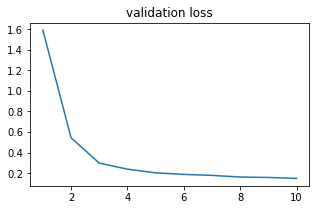

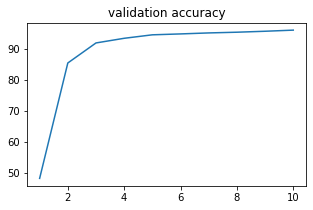

In [22]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), lossv)
plt.title('validation loss')

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), accv)
plt.title('validation accuracy');

In [23]:
#class Net(nn.Module):
#    def __init__(self, Net):


#        for layer in Net.named_modules():
#            print(layer)

In [71]:
model.fc5.weight[0]

tensor([ 2.8105e-01, -3.7906e-02,  2.7748e-01,  1.5855e-01,  2.1649e-03,
        -1.7620e-01,  1.5567e-01, -1.0434e-01, -3.1926e-01,  2.6502e-01,
        -7.1107e-02, -4.9589e-01,  1.3341e-01, -1.3281e-01, -5.7497e-02,
         3.1825e-01,  3.1855e-01,  3.8258e-02, -1.0258e-01,  3.4549e-02,
         9.6535e-02,  1.2182e-01, -4.9490e-01, -5.4785e-01, -1.8050e-01,
        -3.2021e-01, -3.2334e-02,  1.5379e-02, -1.4431e-01,  2.3733e-01,
         2.4969e-01, -8.7807e-02,  1.2772e-01, -1.3552e-01, -1.4799e-01,
         1.3973e-01,  5.4057e-01,  2.8601e-01, -1.8905e-01,  2.0853e-01,
         3.4990e-05,  3.6780e-01, -2.5595e-01, -2.0330e-02,  4.1752e-01,
        -1.8082e-02, -5.7366e-01,  3.3370e-01, -7.1413e-01, -6.5762e-02],
       grad_fn=<SelectBackward>)

torch.Size([50, 784])
torch.Size([784])
tensor(0.0349, grad_fn=<SelectBackward>)


In [26]:

model.fc1.weight.size()

torch.Size([50, 784])

In [27]:
model.fc2.weight



Parameter containing:
tensor([[ 0.0206, -0.0559,  0.0236,  ...,  0.1230,  0.0151,  0.2391],
        [ 0.0850, -0.1188,  0.1156,  ...,  0.0142,  0.0137,  0.0612],
        [ 0.2093, -0.1250,  0.0737,  ...,  0.0138, -0.0174,  0.0607],
        ...,
        [-0.0852, -0.1523, -0.1537,  ...,  0.0969,  0.0744, -0.1056],
        [ 0.0023,  0.3771,  0.1167,  ..., -0.0300, -0.2168, -0.1135],
        [ 0.3753,  0.0869,  0.0400,  ...,  0.0910, -0.0418,  0.2144]],
       requires_grad=True)

In [28]:
model.fc3.weight


Parameter containing:
tensor([[-0.0891, -0.1436,  0.1826,  ..., -0.1204,  0.0622, -0.0202],
        [ 0.1552,  0.1152,  0.2123,  ..., -0.0590, -0.0314,  0.0845],
        [ 0.1300, -0.0182,  0.0050,  ...,  0.1450, -0.1891, -0.0030],
        ...,
        [-0.0971, -0.1553,  0.1382,  ...,  0.0203,  0.0453,  0.2840],
        [-0.0434, -0.2382, -0.0607,  ...,  0.1717,  0.1198,  0.1136],
        [ 0.1017, -0.0252, -0.2589,  ...,  0.2376,  0.1953, -0.1567]],
       requires_grad=True)

In [29]:
model.fc4.weight


Parameter containing:
tensor([[-0.1512, -0.0183, -0.0783,  ..., -0.2007,  0.1047,  0.2728],
        [ 0.0509, -0.0447, -0.1909,  ..., -0.0585,  0.0158, -0.1087],
        [-0.0505, -0.0414, -0.0559,  ..., -0.0429, -0.0878,  0.1150],
        ...,
        [-0.0814,  0.1317,  0.0651,  ..., -0.0305, -0.0095, -0.0159],
        [ 0.2137, -0.0419, -0.2042,  ...,  0.1085, -0.0325, -0.0013],
        [-0.0720,  0.0582, -0.1456,  ..., -0.3069, -0.1786,  0.0214]],
       requires_grad=True)

In [56]:
model.fc5.weight[1]


tensor([-0.4709, -0.3558, -0.1893, -0.2842,  0.1292,  0.4714,  0.0058,  0.3063,
         0.4264, -0.3576,  0.0243,  0.4629, -0.3853,  0.0602,  0.3921, -0.5232,
        -0.6272,  0.0050,  0.0193,  0.1251,  0.1898, -0.1119,  0.3505, -0.0937,
        -0.5573,  0.0072, -0.1043,  0.0779,  0.3844,  0.0256,  0.2761,  0.0448,
        -0.2943, -0.1552,  0.4393,  0.1440,  0.0845, -0.5231,  0.2080,  0.2920,
        -0.2548, -0.2817, -0.2620,  0.3031,  0.0901, -0.0364,  0.2421, -0.0128,
         0.0197, -0.4053], grad_fn=<SelectBackward>)

In [34]:
print(model.fc1.weight.size())
print(model.fc2.weight.size())
print(model.fc3.weight.size())
print(model.fc4.weight.size())
print(model.fc5.weight.size())

torch.Size([50, 784])
torch.Size([50, 50])
torch.Size([50, 50])
torch.Size([50, 50])
torch.Size([10, 50])


In [79]:
import networkx as nx
G = nx.DiGraph()

In [106]:
#Create nodes of graph
for layer_index in range(1,6):
    layer = None
    if(layer_index == 1): layer = model.fc1
    if(layer_index == 2): layer = model.fc2
    if(layer_index == 3): layer = model.fc3
    if(layer_index == 4): layer = model.fc4
    if(layer_index == 5): layer = model.fc5
    for neuron_index in range(0,layer.weight.size()[1]):
        print("n"+str(layer_index)+"_"+str(neuron_index))
        G.add_node("n"+str(layer_index)+"_"+str(neuron_index))
    
    print("Layer "+str(layer_index)+" done")
    
for neuron_index in range(0,model.fc5.weight.size()[0]):
        print("out_"+str(neuron_index))
        G.add_node("out_"+str(neuron_index))
    
print("Output layer done")

n1_0
n1_1
n1_2
n1_3
n1_4
n1_5
n1_6
n1_7
n1_8
n1_9
n1_10
n1_11
n1_12
n1_13
n1_14
n1_15
n1_16
n1_17
n1_18
n1_19
n1_20
n1_21
n1_22
n1_23
n1_24
n1_25
n1_26
n1_27
n1_28
n1_29
n1_30
n1_31
n1_32
n1_33
n1_34
n1_35
n1_36
n1_37
n1_38
n1_39
n1_40
n1_41
n1_42
n1_43
n1_44
n1_45
n1_46
n1_47
n1_48
n1_49
n1_50
n1_51
n1_52
n1_53
n1_54
n1_55
n1_56
n1_57
n1_58
n1_59
n1_60
n1_61
n1_62
n1_63
n1_64
n1_65
n1_66
n1_67
n1_68
n1_69
n1_70
n1_71
n1_72
n1_73
n1_74
n1_75
n1_76
n1_77
n1_78
n1_79
n1_80
n1_81
n1_82
n1_83
n1_84
n1_85
n1_86
n1_87
n1_88
n1_89
n1_90
n1_91
n1_92
n1_93
n1_94
n1_95
n1_96
n1_97
n1_98
n1_99
n1_100
n1_101
n1_102
n1_103
n1_104
n1_105
n1_106
n1_107
n1_108
n1_109
n1_110
n1_111
n1_112
n1_113
n1_114
n1_115
n1_116
n1_117
n1_118
n1_119
n1_120
n1_121
n1_122
n1_123
n1_124
n1_125
n1_126
n1_127
n1_128
n1_129
n1_130
n1_131
n1_132
n1_133
n1_134
n1_135
n1_136
n1_137
n1_138
n1_139
n1_140
n1_141
n1_142
n1_143
n1_144
n1_145
n1_146
n1_147
n1_148
n1_149
n1_150
n1_151
n1_152
n1_153
n1_154
n1_155
n1_156
n1_157
n1_1

In [107]:
# 50 rows with 784 columns
# each value is the edge weight from input neuron y to output neuron x
print(model.fc1.weight.size())
print(model.fc1.weight.size()[0])
print(model.fc1.weight.size()[1])
print(model.fc1.weight[0].size())
print(model.fc1.weight[0][0])

torch.Size([50, 784])
50
784
torch.Size([784])
tensor(0.0349, grad_fn=<SelectBackward>)


In [115]:
#Create edges of graph
#G.add_edge(1, 2)
#G.add_weighted_edges_from([(0, 1, 3.0), (1, 2, 7.5)])
for layer_index in range(1,5):
    layer = None
    if(layer_index == 1): layer = model.fc1
    if(layer_index == 2): layer = model.fc2
    if(layer_index == 3): layer = model.fc3
    if(layer_index == 4): layer = model.fc4
    #if(layer_index == 5): layer = model.fc5
        
    for x in range(0,layer.weight.size()[0]):
        for y in range(0,layer.weight.size()[1]):
            inNode = "n"+str(layer_index)+"_"+str(y)
            outNode = "n"+str(layer_index+1)+"_"+str(x)
            G.add_weighted_edges_from([(inNode, outNode, layer.weight[x][y].item())])
            print("Added edge from "+inNode+" to "+outNode+" with weight "+str(layer.weight[x][y].item()))
    print("Layer "+str(layer_index)+" edges done")
    
for x in range(0,model.fc5.weight.size()[0]):
        for y in range(0,model.fc5.weight.size()[1]):
            inNode = "n5_"+str(y)
            outNode = "out_"+str(x)
            G.add_weighted_edges_from([(inNode, outNode, layer.weight[x][y].item())])
            print("Added edge from "+inNode+" to "+outNode+" with weight "+str(layer.weight[x][y].item()))
print("Output layer edges done")

Added edge from n1_0 to n2_0 with weight 0.034922029823064804
Added edge from n1_1 to n2_0 with weight -0.029368886724114418
Added edge from n1_2 to n2_0 with weight 0.027029480785131454
Added edge from n1_3 to n2_0 with weight -0.02128242701292038
Added edge from n1_4 to n2_0 with weight 0.020249497145414352
Added edge from n1_5 to n2_0 with weight -0.01740952953696251
Added edge from n1_6 to n2_0 with weight 0.022815320640802383
Added edge from n1_7 to n2_0 with weight -0.02049608901143074
Added edge from n1_8 to n2_0 with weight 0.013063609600067139
Added edge from n1_9 to n2_0 with weight -0.032679930329322815
Added edge from n1_10 to n2_0 with weight -0.003970436751842499
Added edge from n1_11 to n2_0 with weight 0.014553733170032501
Added edge from n1_12 to n2_0 with weight 0.017276369035243988
Added edge from n1_13 to n2_0 with weight 0.019671550020575523
Added edge from n1_14 to n2_0 with weight 0.0012139439349994063
Added edge from n1_15 to n2_0 with weight 0.02634900435805320

Added edge from n1_573 to n2_1 with weight -0.02196345292031765
Added edge from n1_574 to n2_1 with weight -0.05011911690235138
Added edge from n1_575 to n2_1 with weight -0.006411278620362282
Added edge from n1_576 to n2_1 with weight -0.059544600546360016
Added edge from n1_577 to n2_1 with weight -0.047977808862924576
Added edge from n1_578 to n2_1 with weight -0.0004899067571386695
Added edge from n1_579 to n2_1 with weight -0.017887871712446213
Added edge from n1_580 to n2_1 with weight 0.03775206208229065
Added edge from n1_581 to n2_1 with weight -0.030881160870194435
Added edge from n1_582 to n2_1 with weight -0.05105820670723915
Added edge from n1_583 to n2_1 with weight -0.02832772210240364
Added edge from n1_584 to n2_1 with weight -0.05816163122653961
Added edge from n1_585 to n2_1 with weight -0.005912331864237785
Added edge from n1_586 to n2_1 with weight -0.005616961978375912
Added edge from n1_587 to n2_1 with weight -0.00232285656966269
Added edge from n1_588 to n2_1 w

Added edge from n1_407 to n2_3 with weight 0.05746766924858093
Added edge from n1_408 to n2_3 with weight 0.06287462264299393
Added edge from n1_409 to n2_3 with weight 0.0038322657346725464
Added edge from n1_410 to n2_3 with weight -0.04371464625000954
Added edge from n1_411 to n2_3 with weight -0.05277745798230171
Added edge from n1_412 to n2_3 with weight -0.0881827175617218
Added edge from n1_413 to n2_3 with weight -0.018896987661719322
Added edge from n1_414 to n2_3 with weight 0.0034781484864652157
Added edge from n1_415 to n2_3 with weight -0.015708647668361664
Added edge from n1_416 to n2_3 with weight 0.009300240315496922
Added edge from n1_417 to n2_3 with weight -0.001494583673775196
Added edge from n1_418 to n2_3 with weight 0.031068909913301468
Added edge from n1_419 to n2_3 with weight -0.031728170812129974
Added edge from n1_420 to n2_3 with weight -0.005330188199877739
Added edge from n1_421 to n2_3 with weight 0.026607876643538475
Added edge from n1_422 to n2_3 with 

Added edge from n1_623 to n2_4 with weight -0.018740534782409668
Added edge from n1_624 to n2_4 with weight -0.03008238412439823
Added edge from n1_625 to n2_4 with weight -0.02358592115342617
Added edge from n1_626 to n2_4 with weight -0.001836564508266747
Added edge from n1_627 to n2_4 with weight 0.026639865711331367
Added edge from n1_628 to n2_4 with weight 0.04161764681339264
Added edge from n1_629 to n2_4 with weight 0.003388260956853628
Added edge from n1_630 to n2_4 with weight -0.05514086037874222
Added edge from n1_631 to n2_4 with weight 0.01432758942246437
Added edge from n1_632 to n2_4 with weight -0.03063054010272026
Added edge from n1_633 to n2_4 with weight -0.027655337005853653
Added edge from n1_634 to n2_4 with weight 0.021662844344973564
Added edge from n1_635 to n2_4 with weight -0.016840046271681786
Added edge from n1_636 to n2_4 with weight 0.0061820074915885925
Added edge from n1_637 to n2_4 with weight 0.07160636782646179
Added edge from n1_638 to n2_4 with we

Added edge from n1_555 to n2_6 with weight 0.0035365375224500895
Added edge from n1_556 to n2_6 with weight 0.034088052809238434
Added edge from n1_557 to n2_6 with weight 0.003475802717730403
Added edge from n1_558 to n2_6 with weight 0.02769998461008072
Added edge from n1_559 to n2_6 with weight -0.030564235523343086
Added edge from n1_560 to n2_6 with weight -0.015368921682238579
Added edge from n1_561 to n2_6 with weight 0.025573691353201866
Added edge from n1_562 to n2_6 with weight 0.013521886430680752
Added edge from n1_563 to n2_6 with weight 0.007637269329279661
Added edge from n1_564 to n2_6 with weight -0.015023685060441494
Added edge from n1_565 to n2_6 with weight 0.006593560334295034
Added edge from n1_566 to n2_6 with weight -0.005051466170698404
Added edge from n1_567 to n2_6 with weight -0.022182051092386246
Added edge from n1_568 to n2_6 with weight 0.04512668773531914
Added edge from n1_569 to n2_6 with weight 0.06288212537765503
Added edge from n1_570 to n2_6 with w

Added edge from n1_237 to n2_8 with weight -0.016012052074074745
Added edge from n1_238 to n2_8 with weight -0.005073361564427614
Added edge from n1_239 to n2_8 with weight -0.012595225125551224
Added edge from n1_240 to n2_8 with weight 0.053666118532419205
Added edge from n1_241 to n2_8 with weight 0.035412151366472244
Added edge from n1_242 to n2_8 with weight 0.035755280405282974
Added edge from n1_243 to n2_8 with weight 0.06015869975090027
Added edge from n1_244 to n2_8 with weight -0.005691559985280037
Added edge from n1_245 to n2_8 with weight 0.005125210154801607
Added edge from n1_246 to n2_8 with weight 0.04503510519862175
Added edge from n1_247 to n2_8 with weight -0.07478863000869751
Added edge from n1_248 to n2_8 with weight -0.024348968639969826
Added edge from n1_249 to n2_8 with weight -0.02571674808859825
Added edge from n1_250 to n2_8 with weight 0.025529811158776283
Added edge from n1_251 to n2_8 with weight 0.03515641391277313
Added edge from n1_252 to n2_8 with we

Added edge from n1_702 to n2_9 with weight -0.015455336309969425
Added edge from n1_703 to n2_9 with weight 0.02019462175667286
Added edge from n1_704 to n2_9 with weight -0.011875254102051258
Added edge from n1_705 to n2_9 with weight -0.01116362027823925
Added edge from n1_706 to n2_9 with weight 0.01862579956650734
Added edge from n1_707 to n2_9 with weight -0.030290473252534866
Added edge from n1_708 to n2_9 with weight -0.01275835931301117
Added edge from n1_709 to n2_9 with weight 0.02021358348429203
Added edge from n1_710 to n2_9 with weight 0.04726070538163185
Added edge from n1_711 to n2_9 with weight -0.005897557362914085
Added edge from n1_712 to n2_9 with weight 0.0029497374780476093
Added edge from n1_713 to n2_9 with weight -0.0328197106719017
Added edge from n1_714 to n2_9 with weight -0.06495145708322525
Added edge from n1_715 to n2_9 with weight -0.003537117037922144
Added edge from n1_716 to n2_9 with weight -0.043261244893074036
Added edge from n1_717 to n2_9 with we

Added edge from n1_633 to n2_11 with weight 0.04990636929869652
Added edge from n1_634 to n2_11 with weight -0.011309759691357613
Added edge from n1_635 to n2_11 with weight -0.040232714265584946
Added edge from n1_636 to n2_11 with weight -0.04523381590843201
Added edge from n1_637 to n2_11 with weight -0.031851302832365036
Added edge from n1_638 to n2_11 with weight -0.03308608755469322
Added edge from n1_639 to n2_11 with weight 0.010605215094983578
Added edge from n1_640 to n2_11 with weight -0.04659680649638176
Added edge from n1_641 to n2_11 with weight -0.03390676528215408
Added edge from n1_642 to n2_11 with weight 0.014620350673794746
Added edge from n1_643 to n2_11 with weight 0.03190147876739502
Added edge from n1_644 to n2_11 with weight 0.027858633548021317
Added edge from n1_645 to n2_11 with weight 0.025547411292791367
Added edge from n1_646 to n2_11 with weight -0.03309841454029083
Added edge from n1_647 to n2_11 with weight 0.029348008334636688
Added edge from n1_648 t

Added edge from n1_565 to n2_13 with weight -0.013803522102534771
Added edge from n1_566 to n2_13 with weight -0.0319213829934597
Added edge from n1_567 to n2_13 with weight -0.02951803244650364
Added edge from n1_568 to n2_13 with weight -0.026809915900230408
Added edge from n1_569 to n2_13 with weight 0.037875108420848846
Added edge from n1_570 to n2_13 with weight 0.08304713666439056
Added edge from n1_571 to n2_13 with weight 0.06908837705850601
Added edge from n1_572 to n2_13 with weight 0.0767986997961998
Added edge from n1_573 to n2_13 with weight 0.0179548691958189
Added edge from n1_574 to n2_13 with weight 0.05116031691431999
Added edge from n1_575 to n2_13 with weight 0.03192862868309021
Added edge from n1_576 to n2_13 with weight 0.07638039439916611
Added edge from n1_577 to n2_13 with weight 0.06516514718532562
Added edge from n1_578 to n2_13 with weight 0.10401652008295059
Added edge from n1_579 to n2_13 with weight 0.06341838836669922
Added edge from n1_580 to n2_13 with

Added edge from n1_496 to n2_15 with weight 0.02117885649204254
Added edge from n1_497 to n2_15 with weight 0.04081961512565613
Added edge from n1_498 to n2_15 with weight -0.00252738781273365
Added edge from n1_499 to n2_15 with weight -0.02708667330443859
Added edge from n1_500 to n2_15 with weight 0.040122322738170624
Added edge from n1_501 to n2_15 with weight 0.03416313976049423
Added edge from n1_502 to n2_15 with weight 0.030001409351825714
Added edge from n1_503 to n2_15 with weight -0.013230472803115845
Added edge from n1_504 to n2_15 with weight -0.03455037251114845
Added edge from n1_505 to n2_15 with weight -0.02505585178732872
Added edge from n1_506 to n2_15 with weight -0.02614797279238701
Added edge from n1_507 to n2_15 with weight -0.038420669734478
Added edge from n1_508 to n2_15 with weight -0.041608069092035294
Added edge from n1_509 to n2_15 with weight -0.0037691707257181406
Added edge from n1_510 to n2_15 with weight -0.06239708513021469
Added edge from n1_511 to 

Added edge from n1_306 to n2_17 with weight 0.013880111277103424
Added edge from n1_307 to n2_17 with weight 0.02166595496237278
Added edge from n1_308 to n2_17 with weight 0.023086391389369965
Added edge from n1_309 to n2_17 with weight -0.017540203407406807
Added edge from n1_310 to n2_17 with weight 0.03632477670907974
Added edge from n1_311 to n2_17 with weight 0.044376060366630554
Added edge from n1_312 to n2_17 with weight -0.007081365678459406
Added edge from n1_313 to n2_17 with weight 0.03779762238264084
Added edge from n1_314 to n2_17 with weight 0.04738069325685501
Added edge from n1_315 to n2_17 with weight 0.0068064406514167786
Added edge from n1_316 to n2_17 with weight 0.0005353974411264062
Added edge from n1_317 to n2_17 with weight 0.02377329394221306
Added edge from n1_318 to n2_17 with weight -0.0766296535730362
Added edge from n1_319 to n2_17 with weight -0.03418619930744171
Added edge from n1_320 to n2_17 with weight -0.05059684067964554
Added edge from n1_321 to n

Added edge from n1_127 to n2_19 with weight -0.007728162687271833
Added edge from n1_128 to n2_19 with weight 0.05110127851366997
Added edge from n1_129 to n2_19 with weight 0.011093702167272568
Added edge from n1_130 to n2_19 with weight -0.04332681745290756
Added edge from n1_131 to n2_19 with weight -0.0011615038383752108
Added edge from n1_132 to n2_19 with weight -0.015448694117367268
Added edge from n1_133 to n2_19 with weight -0.011394254863262177
Added edge from n1_134 to n2_19 with weight -0.06876268982887268
Added edge from n1_135 to n2_19 with weight -0.03750601410865784
Added edge from n1_136 to n2_19 with weight -0.023639079183340073
Added edge from n1_137 to n2_19 with weight -0.03684510290622711
Added edge from n1_138 to n2_19 with weight -0.00298067438416183
Added edge from n1_139 to n2_19 with weight 0.010572156868875027
Added edge from n1_140 to n2_19 with weight 0.012488838285207748
Added edge from n1_141 to n2_19 with weight -0.03379945829510689
Added edge from n1_1

Added edge from n1_653 to n2_20 with weight -0.019459273666143417
Added edge from n1_654 to n2_20 with weight 0.01396207232028246
Added edge from n1_655 to n2_20 with weight 0.04041433706879616
Added edge from n1_656 to n2_20 with weight 0.029681352898478508
Added edge from n1_657 to n2_20 with weight 0.053324852138757706
Added edge from n1_658 to n2_20 with weight 0.02550889551639557
Added edge from n1_659 to n2_20 with weight 0.091498963534832
Added edge from n1_660 to n2_20 with weight 0.04518381506204605
Added edge from n1_661 to n2_20 with weight 0.056898538023233414
Added edge from n1_662 to n2_20 with weight -0.010077746585011482
Added edge from n1_663 to n2_20 with weight -0.04233502596616745
Added edge from n1_664 to n2_20 with weight -0.0401381216943264
Added edge from n1_665 to n2_20 with weight 0.018847351893782616
Added edge from n1_666 to n2_20 with weight 0.02701844833791256
Added edge from n1_667 to n2_20 with weight -0.03800521790981293
Added edge from n1_668 to n2_20 

Added edge from n1_506 to n2_22 with weight -0.006030202377587557
Added edge from n1_507 to n2_22 with weight 0.013528598472476006
Added edge from n1_508 to n2_22 with weight -0.018713589757680893
Added edge from n1_509 to n2_22 with weight -0.04520483687520027
Added edge from n1_510 to n2_22 with weight -0.11109563708305359
Added edge from n1_511 to n2_22 with weight -0.09010998904705048
Added edge from n1_512 to n2_22 with weight -0.05618267133831978
Added edge from n1_513 to n2_22 with weight -0.0023972485214471817
Added edge from n1_514 to n2_22 with weight -0.03566102311015129
Added edge from n1_515 to n2_22 with weight -0.01963878981769085
Added edge from n1_516 to n2_22 with weight 0.022518053650856018
Added edge from n1_517 to n2_22 with weight 0.0362882986664772
Added edge from n1_518 to n2_22 with weight -0.015164113603532314
Added edge from n1_519 to n2_22 with weight -0.11218362301588058
Added edge from n1_520 to n2_22 with weight -0.13362136483192444
Added edge from n1_521

Added edge from n1_289 to n2_24 with weight 0.055704906582832336
Added edge from n1_290 to n2_24 with weight 0.03782277554273605
Added edge from n1_291 to n2_24 with weight -0.02973150834441185
Added edge from n1_292 to n2_24 with weight -0.0053707207553088665
Added edge from n1_293 to n2_24 with weight -0.030640460550785065
Added edge from n1_294 to n2_24 with weight -0.04265212267637253
Added edge from n1_295 to n2_24 with weight 0.0025821852032095194
Added edge from n1_296 to n2_24 with weight 0.10946541279554367
Added edge from n1_297 to n2_24 with weight 0.08313678950071335
Added edge from n1_298 to n2_24 with weight 0.008172832429409027
Added edge from n1_299 to n2_24 with weight 0.008270792663097382
Added edge from n1_300 to n2_24 with weight -0.03672753646969795
Added edge from n1_301 to n2_24 with weight -0.05558474734425545
Added edge from n1_302 to n2_24 with weight -0.005541035905480385
Added edge from n1_303 to n2_24 with weight -0.0294472835958004
Added edge from n1_304 t

Added edge from n1_119 to n2_26 with weight -0.04914684221148491
Added edge from n1_120 to n2_26 with weight -0.020294610410928726
Added edge from n1_121 to n2_26 with weight -0.06677313894033432
Added edge from n1_122 to n2_26 with weight -0.04494394361972809
Added edge from n1_123 to n2_26 with weight -0.0021495516411960125
Added edge from n1_124 to n2_26 with weight -0.022640323266386986
Added edge from n1_125 to n2_26 with weight -0.001932610059157014
Added edge from n1_126 to n2_26 with weight 0.007529926486313343
Added edge from n1_127 to n2_26 with weight 0.0026510548777878284
Added edge from n1_128 to n2_26 with weight -0.0014633932150900364
Added edge from n1_129 to n2_26 with weight 0.02509300783276558
Added edge from n1_130 to n2_26 with weight 0.010664964094758034
Added edge from n1_131 to n2_26 with weight 0.02157808467745781
Added edge from n1_132 to n2_26 with weight -0.042721714824438095
Added edge from n1_133 to n2_26 with weight -0.011418209411203861
Added edge from n

Added edge from n1_695 to n2_27 with weight 0.030028097331523895
Added edge from n1_696 to n2_27 with weight -0.032778337597846985
Added edge from n1_697 to n2_27 with weight 0.01704990305006504
Added edge from n1_698 to n2_27 with weight -0.019465114921331406
Added edge from n1_699 to n2_27 with weight 0.0344964824616909
Added edge from n1_700 to n2_27 with weight 0.005294032394886017
Added edge from n1_701 to n2_27 with weight 0.012028045952320099
Added edge from n1_702 to n2_27 with weight 0.014550593681633472
Added edge from n1_703 to n2_27 with weight 0.023209676146507263
Added edge from n1_704 to n2_27 with weight 0.03234982490539551
Added edge from n1_705 to n2_27 with weight 0.01249714381992817
Added edge from n1_706 to n2_27 with weight -0.007968944497406483
Added edge from n1_707 to n2_27 with weight 0.013565520755946636
Added edge from n1_708 to n2_27 with weight -0.040686123073101044
Added edge from n1_709 to n2_27 with weight -0.05646921694278717
Added edge from n1_710 to 

Added edge from n1_253 to n2_29 with weight 0.005788970272988081
Added edge from n1_254 to n2_29 with weight -0.005708230193704367
Added edge from n1_255 to n2_29 with weight -0.006547397933900356
Added edge from n1_256 to n2_29 with weight -0.032964836806058884
Added edge from n1_257 to n2_29 with weight 0.0024083973839879036
Added edge from n1_258 to n2_29 with weight -0.033548299223184586
Added edge from n1_259 to n2_29 with weight -0.04408503696322441
Added edge from n1_260 to n2_29 with weight -0.002572850789874792
Added edge from n1_261 to n2_29 with weight 0.05373978987336159
Added edge from n1_262 to n2_29 with weight 0.007004537153989077
Added edge from n1_263 to n2_29 with weight -0.02917507104575634
Added edge from n1_264 to n2_29 with weight -0.02468632161617279
Added edge from n1_265 to n2_29 with weight -0.04815641790628433
Added edge from n1_266 to n2_29 with weight -0.061794474720954895
Added edge from n1_267 to n2_29 with weight -0.05077490955591202
Added edge from n1_

Added edge from n1_194 to n2_31 with weight 0.001238127239048481
Added edge from n1_195 to n2_31 with weight -0.03288112208247185
Added edge from n1_196 to n2_31 with weight -0.026930009946227074
Added edge from n1_197 to n2_31 with weight -0.010243270546197891
Added edge from n1_198 to n2_31 with weight -0.009439193643629551
Added edge from n1_199 to n2_31 with weight -0.03233147785067558
Added edge from n1_200 to n2_31 with weight -0.052505478262901306
Added edge from n1_201 to n2_31 with weight -0.0252253245562315
Added edge from n1_202 to n2_31 with weight -0.009722388349473476
Added edge from n1_203 to n2_31 with weight 0.029450898990035057
Added edge from n1_204 to n2_31 with weight 0.0198067594319582
Added edge from n1_205 to n2_31 with weight 0.02823520451784134
Added edge from n1_206 to n2_31 with weight 0.043490875512361526
Added edge from n1_207 to n2_31 with weight 0.07597946375608444
Added edge from n1_208 to n2_31 with weight 0.02484661340713501
Added edge from n1_209 to 

Added edge from n1_245 to n2_32 with weight 0.04535209387540817
Added edge from n1_246 to n2_32 with weight -0.0011684468481689692
Added edge from n1_247 to n2_32 with weight -0.025355026125907898
Added edge from n1_248 to n2_32 with weight -0.03028903529047966
Added edge from n1_249 to n2_32 with weight -0.02506379969418049
Added edge from n1_250 to n2_32 with weight -0.04336949810385704
Added edge from n1_251 to n2_32 with weight -0.031379058957099915
Added edge from n1_252 to n2_32 with weight -0.01989453099668026
Added edge from n1_253 to n2_32 with weight 0.03170163184404373
Added edge from n1_254 to n2_32 with weight 0.007658788934350014
Added edge from n1_255 to n2_32 with weight 0.0018711966695263982
Added edge from n1_256 to n2_32 with weight -0.011340932920575142
Added edge from n1_257 to n2_32 with weight -0.0014973713550716639
Added edge from n1_258 to n2_32 with weight -0.04920926317572594
Added edge from n1_259 to n2_32 with weight -0.053490228950977325
Added edge from n1

Added edge from n1_95 to n2_34 with weight 0.06004416570067406
Added edge from n1_96 to n2_34 with weight 0.05433875694870949
Added edge from n1_97 to n2_34 with weight 0.020927703008055687
Added edge from n1_98 to n2_34 with weight 0.07168594002723694
Added edge from n1_99 to n2_34 with weight 0.08025730401277542
Added edge from n1_100 to n2_34 with weight 0.01877543330192566
Added edge from n1_101 to n2_34 with weight 0.007025750353932381
Added edge from n1_102 to n2_34 with weight 0.03656139597296715
Added edge from n1_103 to n2_34 with weight -0.008186299353837967
Added edge from n1_104 to n2_34 with weight 0.03917169198393822
Added edge from n1_105 to n2_34 with weight 0.041561707854270935
Added edge from n1_106 to n2_34 with weight 0.0279838889837265
Added edge from n1_107 to n2_34 with weight 0.0019984818063676357
Added edge from n1_108 to n2_34 with weight -0.00940225925296545
Added edge from n1_109 to n2_34 with weight -0.019267208874225616
Added edge from n1_110 to n2_34 with

Added edge from n1_26 to n2_36 with weight -0.017179260030388832
Added edge from n1_27 to n2_36 with weight 0.023863259702920914
Added edge from n1_28 to n2_36 with weight 0.0060392580926418304
Added edge from n1_29 to n2_36 with weight -0.010384125635027885
Added edge from n1_30 to n2_36 with weight -0.03532736375927925
Added edge from n1_31 to n2_36 with weight -0.022937260568141937
Added edge from n1_32 to n2_36 with weight 0.011091949418187141
Added edge from n1_33 to n2_36 with weight -0.03172576427459717
Added edge from n1_34 to n2_36 with weight -0.016087651252746582
Added edge from n1_35 to n2_36 with weight -0.030021920800209045
Added edge from n1_36 to n2_36 with weight 0.00015129840176086873
Added edge from n1_37 to n2_36 with weight 0.02141847461462021
Added edge from n1_38 to n2_36 with weight -0.031252264976501465
Added edge from n1_39 to n2_36 with weight 0.018696606159210205
Added edge from n1_40 to n2_36 with weight -0.02368682250380516
Added edge from n1_41 to n2_36 w

Added edge from n1_742 to n2_37 with weight -0.009966060519218445
Added edge from n1_743 to n2_37 with weight 0.013104814104735851
Added edge from n1_744 to n2_37 with weight 0.0071861231699585915
Added edge from n1_745 to n2_37 with weight -0.02151484787464142
Added edge from n1_746 to n2_37 with weight 0.03496487811207771
Added edge from n1_747 to n2_37 with weight 0.009595245122909546
Added edge from n1_748 to n2_37 with weight 0.006912275217473507
Added edge from n1_749 to n2_37 with weight -0.028399597853422165
Added edge from n1_750 to n2_37 with weight 0.002309739124029875
Added edge from n1_751 to n2_37 with weight 0.012538857758045197
Added edge from n1_752 to n2_37 with weight 0.014778868295252323
Added edge from n1_753 to n2_37 with weight 0.001439446583390236
Added edge from n1_754 to n2_37 with weight -0.025832539424300194
Added edge from n1_755 to n2_37 with weight -0.034041013568639755
Added edge from n1_756 to n2_37 with weight -0.017127573490142822
Added edge from n1_7

Added edge from n1_673 to n2_39 with weight -0.03237343579530716
Added edge from n1_674 to n2_39 with weight 0.011164264753460884
Added edge from n1_675 to n2_39 with weight -0.016125081107020378
Added edge from n1_676 to n2_39 with weight 0.05178419128060341
Added edge from n1_677 to n2_39 with weight 0.06611090898513794
Added edge from n1_678 to n2_39 with weight 0.014495303854346275
Added edge from n1_679 to n2_39 with weight 0.0332326665520668
Added edge from n1_680 to n2_39 with weight 0.000587193644605577
Added edge from n1_681 to n2_39 with weight -0.028072504326701164
Added edge from n1_682 to n2_39 with weight -0.024295443668961525
Added edge from n1_683 to n2_39 with weight -0.02779441513121128
Added edge from n1_684 to n2_39 with weight -0.0415266677737236
Added edge from n1_685 to n2_39 with weight -0.05374651029706001
Added edge from n1_686 to n2_39 with weight -0.1272052526473999
Added edge from n1_687 to n2_39 with weight -0.0660136416554451
Added edge from n1_688 to n2_

Added edge from n1_105 to n2_41 with weight 0.003937417641282082
Added edge from n1_106 to n2_41 with weight 0.0038179000839591026
Added edge from n1_107 to n2_41 with weight 0.03539492189884186
Added edge from n1_108 to n2_41 with weight 0.0011657187715172768
Added edge from n1_109 to n2_41 with weight -0.02775145135819912
Added edge from n1_110 to n2_41 with weight -0.022094478830695152
Added edge from n1_111 to n2_41 with weight -0.007982956245541573
Added edge from n1_112 to n2_41 with weight -0.010390512645244598
Added edge from n1_113 to n2_41 with weight 0.010306816548109055
Added edge from n1_114 to n2_41 with weight 0.0072960807010531425
Added edge from n1_115 to n2_41 with weight 0.016284575685858727
Added edge from n1_116 to n2_41 with weight 0.021677399054169655
Added edge from n1_117 to n2_41 with weight 0.024238592013716698
Added edge from n1_118 to n2_41 with weight 0.017542468383908272
Added edge from n1_119 to n2_41 with weight -0.036711547523736954
Added edge from n1_

Added edge from n1_36 to n2_43 with weight -0.0217488631606102
Added edge from n1_37 to n2_43 with weight 0.030108070001006126
Added edge from n1_38 to n2_43 with weight 0.007868795655667782
Added edge from n1_39 to n2_43 with weight 0.026568805798888206
Added edge from n1_40 to n2_43 with weight 0.018058978021144867
Added edge from n1_41 to n2_43 with weight -0.018286025151610374
Added edge from n1_42 to n2_43 with weight 0.03070799447596073
Added edge from n1_43 to n2_43 with weight -0.006480937357991934
Added edge from n1_44 to n2_43 with weight 0.0005222188192419708
Added edge from n1_45 to n2_43 with weight -0.012701323255896568
Added edge from n1_46 to n2_43 with weight 0.023442480713129044
Added edge from n1_47 to n2_43 with weight 0.025780988857150078
Added edge from n1_48 to n2_43 with weight 0.020012449473142624
Added edge from n1_49 to n2_43 with weight -0.030238548293709755
Added edge from n1_50 to n2_43 with weight 0.025929540395736694
Added edge from n1_51 to n2_43 with w

Added edge from n1_752 to n2_44 with weight -0.003850312903523445
Added edge from n1_753 to n2_44 with weight -0.0111480001360178
Added edge from n1_754 to n2_44 with weight -0.014734098687767982
Added edge from n1_755 to n2_44 with weight -0.01485016942024231
Added edge from n1_756 to n2_44 with weight -0.026622449979186058
Added edge from n1_757 to n2_44 with weight -0.03372713923454285
Added edge from n1_758 to n2_44 with weight 0.026547912508249283
Added edge from n1_759 to n2_44 with weight -0.014645470306277275
Added edge from n1_760 to n2_44 with weight 0.0198373980820179
Added edge from n1_761 to n2_44 with weight -0.01913328282535076
Added edge from n1_762 to n2_44 with weight -0.01368752121925354
Added edge from n1_763 to n2_44 with weight -0.026493286713957787
Added edge from n1_764 to n2_44 with weight -0.012616060674190521
Added edge from n1_765 to n2_44 with weight -0.018681850284337997
Added edge from n1_766 to n2_44 with weight -0.006310253404080868
Added edge from n1_7

Added edge from n1_531 to n2_46 with weight 0.03087822161614895
Added edge from n1_532 to n2_46 with weight 0.021147441118955612
Added edge from n1_533 to n2_46 with weight -0.020876681432127953
Added edge from n1_534 to n2_46 with weight 0.031984493136405945
Added edge from n1_535 to n2_46 with weight -0.018280915915966034
Added edge from n1_536 to n2_46 with weight 0.012300942093133926
Added edge from n1_537 to n2_46 with weight 0.03657978028059006
Added edge from n1_538 to n2_46 with weight 0.006747856270521879
Added edge from n1_539 to n2_46 with weight 0.029851708561182022
Added edge from n1_540 to n2_46 with weight 0.0886940062046051
Added edge from n1_541 to n2_46 with weight 0.098959781229496
Added edge from n1_542 to n2_46 with weight 0.036925699561834335
Added edge from n1_543 to n2_46 with weight -0.07312813401222229
Added edge from n1_544 to n2_46 with weight -0.1083323210477829
Added edge from n1_545 to n2_46 with weight -0.10539133101701736
Added edge from n1_546 to n2_46

Added edge from n1_115 to n2_48 with weight -3.639807619038038e-05
Added edge from n1_116 to n2_48 with weight -0.007411538157612085
Added edge from n1_117 to n2_48 with weight 0.02155901864171028
Added edge from n1_118 to n2_48 with weight -0.02221022918820381
Added edge from n1_119 to n2_48 with weight -0.03438645228743553
Added edge from n1_120 to n2_48 with weight -0.023454532027244568
Added edge from n1_121 to n2_48 with weight 0.004480024334043264
Added edge from n1_122 to n2_48 with weight 0.0010136329801753163
Added edge from n1_123 to n2_48 with weight -0.048270370811223984
Added edge from n1_124 to n2_48 with weight -0.03551999107003212
Added edge from n1_125 to n2_48 with weight -0.07746177166700363
Added edge from n1_126 to n2_48 with weight -0.06332249939441681
Added edge from n1_127 to n2_48 with weight -0.056793082505464554
Added edge from n1_128 to n2_48 with weight -0.07838480174541473
Added edge from n1_129 to n2_48 with weight -0.027715373784303665
Added edge from n1

Added edge from n1_330 to n2_49 with weight -0.10297470539808273
Added edge from n1_331 to n2_49 with weight -0.09497237205505371
Added edge from n1_332 to n2_49 with weight -0.06312485784292221
Added edge from n1_333 to n2_49 with weight -0.05884514003992081
Added edge from n1_334 to n2_49 with weight -0.0009058810537680984
Added edge from n1_335 to n2_49 with weight -0.03563513234257698
Added edge from n1_336 to n2_49 with weight 0.001919042319059372
Added edge from n1_337 to n2_49 with weight -0.009526257403194904
Added edge from n1_338 to n2_49 with weight 0.004512817598879337
Added edge from n1_339 to n2_49 with weight 0.034641705453395844
Added edge from n1_340 to n2_49 with weight -0.0030446669552475214
Added edge from n1_341 to n2_49 with weight -0.015880711376667023
Added edge from n1_342 to n2_49 with weight -0.0543404296040535
Added edge from n1_343 to n2_49 with weight -0.03665400668978691
Added edge from n1_344 to n2_49 with weight -0.02644459903240204
Added edge from n1_3

Added edge from n2_49 to n3_12 with weight -0.07459542900323868
Added edge from n2_0 to n3_13 with weight -0.01776888407766819
Added edge from n2_1 to n3_13 with weight 0.41631412506103516
Added edge from n2_2 to n3_13 with weight 0.13989248871803284
Added edge from n2_3 to n3_13 with weight 0.09191195666790009
Added edge from n2_4 to n3_13 with weight -0.1602131426334381
Added edge from n2_5 to n3_13 with weight 0.2789625823497772
Added edge from n2_6 to n3_13 with weight 0.08615949004888535
Added edge from n2_7 to n3_13 with weight -0.14072653651237488
Added edge from n2_8 to n3_13 with weight 0.22506767511367798
Added edge from n2_9 to n3_13 with weight 0.13877347111701965
Added edge from n2_10 to n3_13 with weight -0.12036136537790298
Added edge from n2_11 to n3_13 with weight -0.11893311142921448
Added edge from n2_12 to n3_13 with weight 0.03232116624712944
Added edge from n2_13 to n3_13 with weight -0.15899696946144104
Added edge from n2_14 to n3_13 with weight 0.044615663588047

Added edge from n2_20 to n3_33 with weight 0.2627067267894745
Added edge from n2_21 to n3_33 with weight -0.23846298456192017
Added edge from n2_22 to n3_33 with weight -0.1994212418794632
Added edge from n2_23 to n3_33 with weight -0.17389534413814545
Added edge from n2_24 to n3_33 with weight -0.15014195442199707
Added edge from n2_25 to n3_33 with weight 0.014822020195424557
Added edge from n2_26 to n3_33 with weight -0.2266436517238617
Added edge from n2_27 to n3_33 with weight -0.060461901128292084
Added edge from n2_28 to n3_33 with weight -0.0055015599355101585
Added edge from n2_29 to n3_33 with weight 0.2094634771347046
Added edge from n2_30 to n3_33 with weight 0.0029995390214025974
Added edge from n2_31 to n3_33 with weight -0.04096924513578415
Added edge from n2_32 to n3_33 with weight -0.029362348839640617
Added edge from n2_33 to n3_33 with weight -0.11869319528341293
Added edge from n2_34 to n3_33 with weight -0.02954571507871151
Added edge from n2_35 to n3_33 with weigh

Added edge from n3_44 to n4_4 with weight 0.00532654020935297
Added edge from n3_45 to n4_4 with weight -0.11277680099010468
Added edge from n3_46 to n4_4 with weight 0.16177695989608765
Added edge from n3_47 to n4_4 with weight -0.07327170670032501
Added edge from n3_48 to n4_4 with weight 0.10852818936109543
Added edge from n3_49 to n4_4 with weight -0.10746833682060242
Added edge from n3_0 to n4_5 with weight 0.24578015506267548
Added edge from n3_1 to n4_5 with weight 0.16454839706420898
Added edge from n3_2 to n4_5 with weight 0.1688154935836792
Added edge from n3_3 to n4_5 with weight -0.015115172602236271
Added edge from n3_4 to n4_5 with weight -0.03948415070772171
Added edge from n3_5 to n4_5 with weight 0.1292700618505478
Added edge from n3_6 to n4_5 with weight -0.05983195826411247
Added edge from n3_7 to n4_5 with weight 0.06398780643939972
Added edge from n3_8 to n4_5 with weight -0.039553284645080566
Added edge from n3_9 to n4_5 with weight -0.10794220119714737
Added edge

Added edge from n3_30 to n4_29 with weight -0.13039110600948334
Added edge from n3_31 to n4_29 with weight 0.028919441625475883
Added edge from n3_32 to n4_29 with weight 0.11703041940927505
Added edge from n3_33 to n4_29 with weight 0.041816260665655136
Added edge from n3_34 to n4_29 with weight -0.05247565358877182
Added edge from n3_35 to n4_29 with weight -0.07337651401758194
Added edge from n3_36 to n4_29 with weight 0.11273341625928879
Added edge from n3_37 to n4_29 with weight 0.10904085636138916
Added edge from n3_38 to n4_29 with weight 0.12582999467849731
Added edge from n3_39 to n4_29 with weight 0.22730594873428345
Added edge from n3_40 to n4_29 with weight -0.0074080899357795715
Added edge from n3_41 to n4_29 with weight -0.013272381387650967
Added edge from n3_42 to n4_29 with weight -0.006303281988948584
Added edge from n3_43 to n4_29 with weight 0.060425255447626114
Added edge from n3_44 to n4_29 with weight -0.029129663482308388
Added edge from n3_45 to n4_29 with weig

Added edge from n4_41 to n5_0 with weight 0.04870462417602539
Added edge from n4_42 to n5_0 with weight -0.18500855565071106
Added edge from n4_43 to n5_0 with weight 0.36162757873535156
Added edge from n4_44 to n5_0 with weight 0.13600000739097595
Added edge from n4_45 to n5_0 with weight -0.007470394019037485
Added edge from n4_46 to n5_0 with weight -0.01694522053003311
Added edge from n4_47 to n5_0 with weight -0.20066452026367188
Added edge from n4_48 to n5_0 with weight 0.10472145676612854
Added edge from n4_49 to n5_0 with weight 0.27276891469955444
Added edge from n4_0 to n5_1 with weight 0.05085824429988861
Added edge from n4_1 to n5_1 with weight -0.04469718039035797
Added edge from n4_2 to n5_1 with weight -0.1908886581659317
Added edge from n4_3 to n5_1 with weight -0.037575989961624146
Added edge from n4_4 to n5_1 with weight 0.2587285041809082
Added edge from n4_5 to n5_1 with weight -0.147984117269516
Added edge from n4_6 to n5_1 with weight -0.2082630693912506
Added edg

Added edge from n4_9 to n5_24 with weight 0.18680566549301147
Added edge from n4_10 to n5_24 with weight -0.008479558862745762
Added edge from n4_11 to n5_24 with weight 0.07888109236955643
Added edge from n4_12 to n5_24 with weight 0.13600009679794312
Added edge from n4_13 to n5_24 with weight -0.35058364272117615
Added edge from n4_14 to n5_24 with weight 0.07187873870134354
Added edge from n4_15 to n5_24 with weight 0.1710193157196045
Added edge from n4_16 to n5_24 with weight -0.2140463888645172
Added edge from n4_17 to n5_24 with weight -0.14528997242450714
Added edge from n4_18 to n5_24 with weight -0.03429246321320534
Added edge from n4_19 to n5_24 with weight -0.04064576327800751
Added edge from n4_20 to n5_24 with weight 0.36491769552230835
Added edge from n4_21 to n5_24 with weight -0.16733869910240173
Added edge from n4_22 to n5_24 with weight 0.11011301726102829
Added edge from n4_23 to n5_24 with weight -0.1057487279176712
Added edge from n4_24 to n5_24 with weight 0.00582

Added edge from n4_45 to n5_47 with weight 0.05931231752038002
Added edge from n4_46 to n5_47 with weight 0.03025905229151249
Added edge from n4_47 to n5_47 with weight -0.030484678223729134
Added edge from n4_48 to n5_47 with weight -0.009484336711466312
Added edge from n4_49 to n5_47 with weight -0.015937142074108124
Added edge from n4_0 to n5_48 with weight 0.2136532962322235
Added edge from n4_1 to n5_48 with weight -0.04188617318868637
Added edge from n4_2 to n5_48 with weight -0.2042047679424286
Added edge from n4_3 to n5_48 with weight 0.05932991951704025
Added edge from n4_4 to n5_48 with weight 0.10757973045110703
Added edge from n4_5 to n5_48 with weight -0.16600088775157928
Added edge from n4_6 to n5_48 with weight -0.23775045573711395
Added edge from n4_7 to n5_48 with weight -0.14822791516780853
Added edge from n4_8 to n5_48 with weight -0.11145375669002533
Added edge from n4_9 to n5_48 with weight 0.2974221706390381
Added edge from n4_10 to n5_48 with weight -0.0813371688

In [116]:
#Export graph to gephi
nx.write_gexf(G, "mlp.gexf")

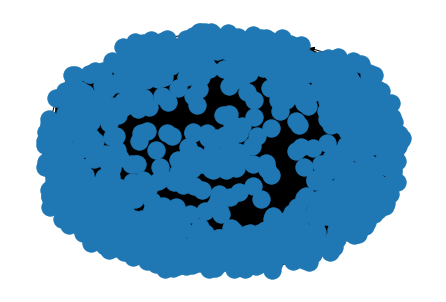

In [118]:
nx.draw(G)